In [27]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--start-maximized")
# chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-blink-features=AutomationControlled")

# Initialize WebDriver
driver = webdriver.Chrome(options=chrome_options)

# Open The Infatuation Best Restaurants Chicago article
url = "https://www.theinfatuation.com/chicago/guides/best-restaurants-chicago"
driver.get(url)

# Wait until restaurant cards are present
wait = WebDriverWait(driver, 30)
wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '[data-testid="venue-venueCard"]')))

# Let the content settle a little more
time.sleep(5)

# Find all restaurant blocks
restaurant_elements = driver.find_elements(By.CSS_SELECTOR, '[data-testid="venue-venueCard"]')

# List to hold restaurant data
restaurants = []

# Extract info from each card
for elem in restaurant_elements[:25]:
    try:
        name = elem.find_element(By.CSS_SELECTOR, '[data-testid="venue-title"]').text.strip()
    except:
        name = 'N/A'

    try:
        # All text in caption details
        full_text = elem.find_element(By.CSS_SELECTOR, '[data-testid="caption-captionDetails"]').text.strip()
        lines = [line.strip() for line in full_text.split('\n') if line.strip() and not line.strip().startswith("$")]
    except:
        lines = []

    try:
        bold_prices = elem.find_elements(By.CSS_SELECTOR, 'span.css-1oehroq')
        price = "$" * len(bold_prices)
    except:
        price = ''

    address = lines[0] if len(lines) > 0 else ''
    cuisine = lines[1] if len(lines) > 1 else ''
    neighborhood = lines[2] if len(lines) > 2 else ''

    restaurants.append({
        "Name": name,
        "Address": address,
        "Price": price,
        "Cuisine": cuisine,
        "Neighborhood": neighborhood
    })

# Convert to DataFrame
df = pd.DataFrame(restaurants)

# Print the DataFrame
print(df)

# Close the browser
driver.quit()

                                Name  \
0                             Oriole   
1                             Kasama   
2                              Schwa   
3                   Kyoten Next Door   
4                   Xocome Antojeria   
5                             Alinea   
6                         Monteverde   
7                 Mariscos San Pedro   
8                              Galit   
9   J.P. Graziano Grocery & Sub Shop   
10                    Akahoshi Ramen   
11                            Obelix   
12                    The Momo World   
13                  Maxwells Trading   
14                         Bavette's   
15                          Valhalla   
16                        JM Seafood   
17                Birrieria Zaragoza   
18        Daisy's Po' Boy and Tavern   
19                            Anelya   
20                              Avec   
21                             Elske   
22          Milly's Pizza In The Pan   
23          Alegrias Seafood Chicago   


In [29]:
df["Name"] = df["Name"].str.upper()
print(df)
display(df)


                                Name  \
0                             ORIOLE   
1                             KASAMA   
2                              SCHWA   
3                   KYOTEN NEXT DOOR   
4                   XOCOME ANTOJERIA   
5                             ALINEA   
6                         MONTEVERDE   
7                 MARISCOS SAN PEDRO   
8                              GALIT   
9   J.P. GRAZIANO GROCERY & SUB SHOP   
10                    AKAHOSHI RAMEN   
11                            OBELIX   
12                    THE MOMO WORLD   
13                  MAXWELLS TRADING   
14                         BAVETTE'S   
15                          VALHALLA   
16                        JM SEAFOOD   
17                BIRRIERIA ZARAGOZA   
18        DAISY'S PO' BOY AND TAVERN   
19                            ANELYA   
20                              AVEC   
21                             ELSKE   
22          MILLY'S PIZZA IN THE PAN   
23          ALEGRIAS SEAFOOD CHICAGO   


,Name,Address,Price,Cuisine,Neighborhood
0,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET
1,KASAMA,"1001 N WINCHESTER AVE CHICAGO, ILLINOIS 60622",$$,FILIPINO,UKRAINIAN VILLAGE
2,SCHWA,"1466 N ASHLAND AVE CHICAGO, IL 60622",$$$$,EXPERIMENTAL,WICKER PARK
3,KYOTEN NEXT DOOR,"2513 W ARMITAGE AVE CHICAGO, IL 60647",$$$$,JAPANESE,LOGAN SQUARE
4,XOCOME ANTOJERIA,"5200 SOUTH ARCHER AVENUE CHICAGO, IL 60632",$$,MEXICAN,ARCHER HEIGHTS
5,ALINEA,"1723 N HALSTED ST CHICAGO, IL 60614",$$$$,EXPERIMENTAL,LINCOLN PARK
6,MONTEVERDE,"1020 W MADISON ST CHICAGO, IL 60607",$$$,ITALIAN,WEST LOOP
7,MARISCOS SAN PEDRO,"1227 W 18TH ST CHICAGO, ILLINOIS 60608",$$,MEXICAN,PILSEN
8,GALIT,"2429 N LINCOLN AVE CHICAGO, ILLINOIS 60614",$$$,MIDDLE EASTERN,LINCOLN PARK
9,J.P. GRAZIANO GROCERY & SUB SHOP,"901 W RANDOLPH ST CHICAGO, IL 60607",$,AMERICAN,WEST LOOP


In [35]:
df.to_csv("infatuation_chicago_restaurants.csv", index=False)

In [37]:
inspections_df = pd.read_csv("Food_Inspections_20250331.csv")

#rename
inspections_df.rename(columns={"DBA Name": "Name"}, inplace=True)

merged_df = pd.merge(df, inspections_df, how="left", on="Name")
merged_df

,Name,Address_x,Price,Cuisine,Neighborhood,Inspection ID,AKA Name,License #,Facility Type,Risk,...,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2575075.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,04/27/2023,Canvass Re-Inspection,Pass,58. ALLERGEN TRAINING AS REQUIRED - Comments: ...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
1,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2510712.0,ORIOLE,2781336.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,06/02/2021,License,Not Ready,NaN,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
2,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2573815.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,04/06/2023,Non-Inspection,No Entry,NaN,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
3,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2574666.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,04/20/2023,Canvass,Fail,54. GARBAGE & REFUSE PROPERLY DISPOSED; FACILI...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
4,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2510742.0,ORIOLE,2418113.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,06/03/2021,Canvass,Out of Business,NaN,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,1975412.0,ELSKE,2458129.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,11/15/2016,License,Pass,NaN,41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"
186,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,1975425.0,ELSKE,2458130.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,11/15/2016,License,Pass,NaN,41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"
187,MILLY'S PIZZA IN THE PAN,"1005 W ARGYLE ST CHICAGO, ILLINOIS 60647",$$,PIZZA,UPTOWN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,ALEGRIAS SEAFOOD CHICAGO,"1024 N. ASHLAND AVE. CHICAGO, IL 60622",$$$,MEXICAN,WICKER PARK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Drop all rows with any NaN values in-place
merged_df.dropna(inplace=True)

# Print the DataFrame to verify the changes
merged_df

,Name,Address_x,Price,Cuisine,Neighborhood,Inspection ID,AKA Name,License #,Facility Type,Risk,...,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2575075.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,04/27/2023,Canvass Re-Inspection,Pass,58. ALLERGEN TRAINING AS REQUIRED - Comments: ...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
3,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2574666.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,04/20/2023,Canvass,Fail,54. GARBAGE & REFUSE PROPERLY DISPOSED; FACILI...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
5,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2510727.0,ORIOLE,2781335.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,06/03/2021,License,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
11,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2151058.0,ORIOLE,2418112.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,03/27/2018,Canvass,Fail,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
12,ORIOLE,"661 W. WALNUT ST. CHICAGO, IL 60661",$$$$,AMERICAN,FULTON MARKET,2159238.0,ORIOLE,2418112.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60661.0,03/30/2018,Canvass Re-Inspection,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.886135,-87.645175,"(41.886135368620835, -87.6451750641585)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,2585780.0,ELSKE,2458129.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,11/27/2023,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"
178,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,2523298.0,ELSKE,2458129.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,07/28/2021,Canvass,Pass w/ Conditions,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"
180,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,2213302.0,ELSKE,2458129.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,08/22/2018,Suspected Food Poisoning,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"
182,ELSKE,"1350 W RANDOLPH ST CHICAGO, IL 60607",$$$$,SCANDINAVIAN,WEST LOOP,2213442.0,ELSKE,2458129.0,Restaurant,Risk 1 (High),...,CHICAGO,IL,60607.0,08/24/2018,Suspected Food Poisoning,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.884296,-87.660770,"(41.88429595787893, -87.66077034614932)"


In [135]:
merged_df.to_csv("merged_cleaned.csv", index=False)


# Univariate Analysis for Question 1

Top 10 Cuisine Types:
Cuisine
AMERICAN        43
EXPERIMENTAL    12
MEXICAN          9
ITALIAN          9
NEPALI           8
SCANDINAVIAN     7
JAPANESE         6
FILIPINO         5
UKRAINIAN        2
Name: count, dtype: int64


/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_15748/1061519330.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="muted")


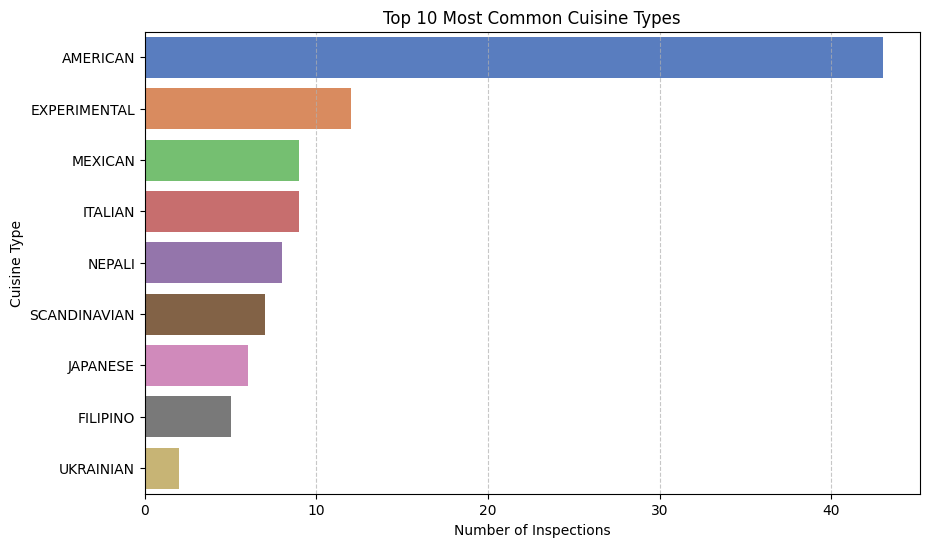


Summary of Critical Violations per Inspection:
count    101.000000
mean       0.059406
std        0.310541
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: Critical_Violation_Count, dtype: float64


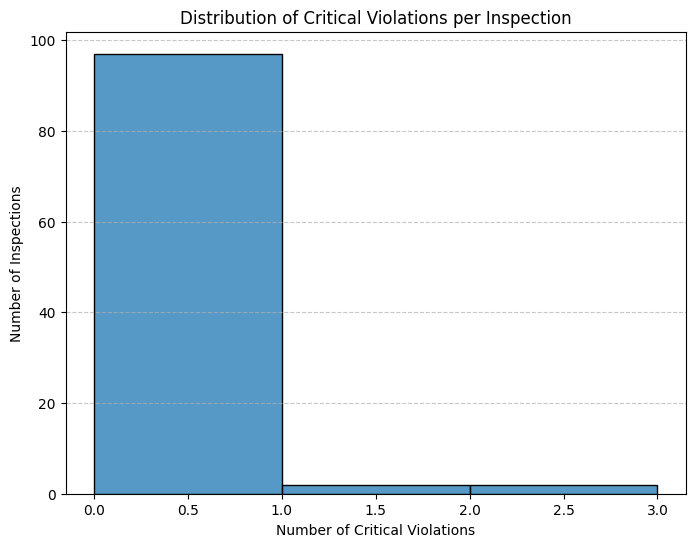


Inspection Results Summary:
Results
Pass                  52
Pass w/ Conditions    26
Fail                  23
Name: count, dtype: int64


/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_15748/1061519330.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x="Results", order=merged_df["Results"].value_counts().index, palette="pastel")


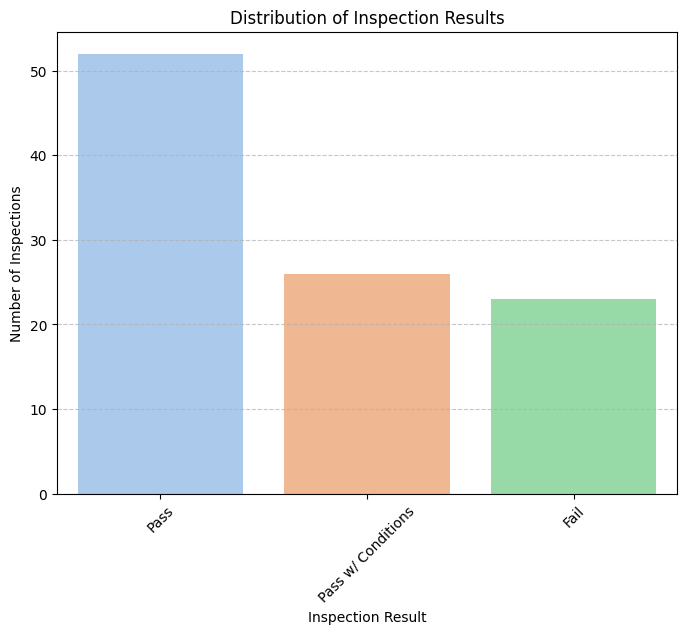

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# ----------------- UNIVARIATE 1: Cuisine Type Distribution -----------------

# Top 10 Cuisine Types
top_cuisines = merged_df["Cuisine"].value_counts().head(10)
print("Top 10 Cuisine Types:")
print(top_cuisines)

# Bar plot for Cuisine Types
plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="muted")
plt.title("Top 10 Most Common Cuisine Types")
plt.xlabel("Number of Inspections")
plt.ylabel("Cuisine Type")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# ----------------- UNIVARIATE 2: Critical Violation Counts -----------------

# Count 'Critical' keywords in Violations text
merged_df["Critical_Violation_Count"] = merged_df["Violations"].apply(
    lambda x: str(x).lower().count("critical") if pd.notnull(x) else 0
)

# Summary of Critical Violations
print("\nSummary of Critical Violations per Inspection:")
print(merged_df["Critical_Violation_Count"].describe())

# Histogram of Critical Violations
plt.figure(figsize=(8,6))
sns.histplot(merged_df["Critical_Violation_Count"], bins=range(0, merged_df["Critical_Violation_Count"].max()+2), kde=False)
plt.title("Distribution of Critical Violations per Inspection")
plt.xlabel("Number of Critical Violations")
plt.ylabel("Number of Inspections")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ----------------- UNIVARIATE 3: Results Distribution (Pass/Fail) -----------------

# Inspection Results Distribution
print("\nInspection Results Summary:")
print(merged_df["Results"].value_counts())

# Bar plot of Results
plt.figure(figsize=(8,6))
sns.countplot(data=merged_df, x="Results", order=merged_df["Results"].value_counts().index, palette="pastel")
plt.title("Distribution of Inspection Results")
plt.xlabel("Inspection Result")
plt.ylabel("Number of Inspections")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




# Birative Analysis for Question 1


Top 10 Cuisines by Average Critical Violations:
Cuisine
ITALIAN         0.222222
AMERICAN        0.093023
EXPERIMENTAL    0.000000
FILIPINO        0.000000
JAPANESE        0.000000
MEXICAN         0.000000
NEPALI          0.000000
SCANDINAVIAN    0.000000
UKRAINIAN       0.000000
Name: Critical_Violation_Count, dtype: float64


/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_15748/1934462560.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_critical_avg.head(10), y=cuisine_critical_avg.head(10).index, palette="rocket")


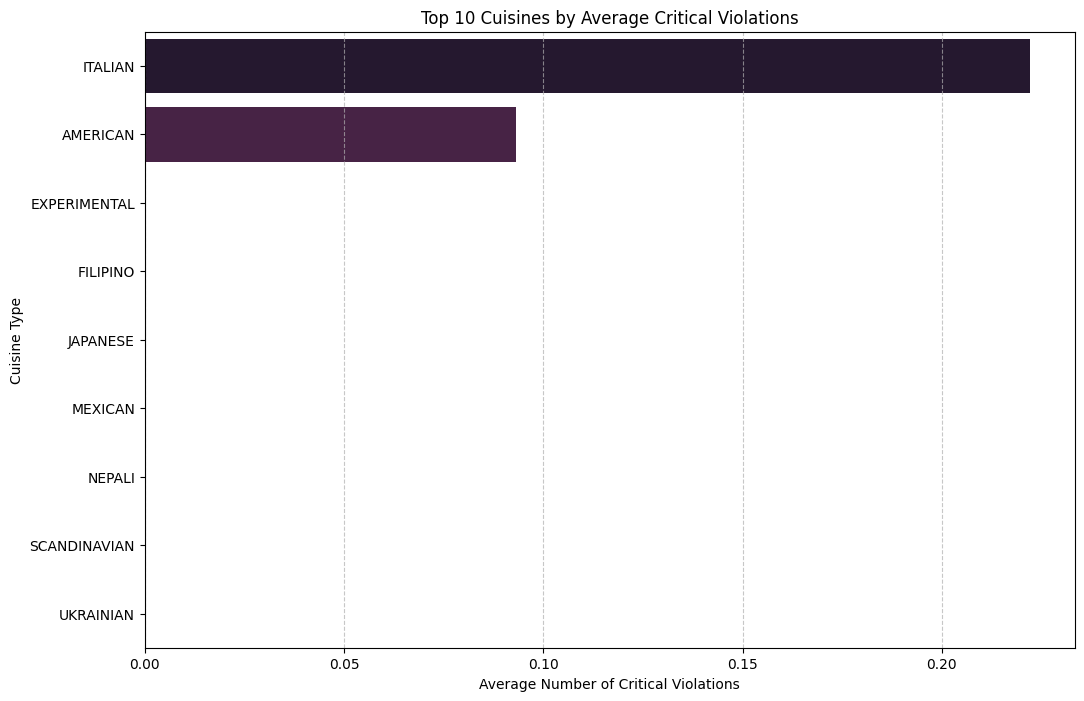


Cuisine Type vs Inspection Result Proportions (Top 10 Cuisines):
Results           Fail      Pass  Pass w/ Conditions
Cuisine                                             
AMERICAN      0.186047  0.651163            0.162791
EXPERIMENTAL  0.250000  0.083333            0.666667
FILIPINO      0.200000  0.600000            0.200000
ITALIAN       0.333333  0.444444            0.222222
JAPANESE      0.333333  0.500000            0.166667
MEXICAN       0.333333  0.444444            0.222222
NEPALI        0.250000  0.500000            0.250000
SCANDINAVIAN  0.142857  0.428571            0.428571
UKRAINIAN     0.000000  1.000000            0.000000


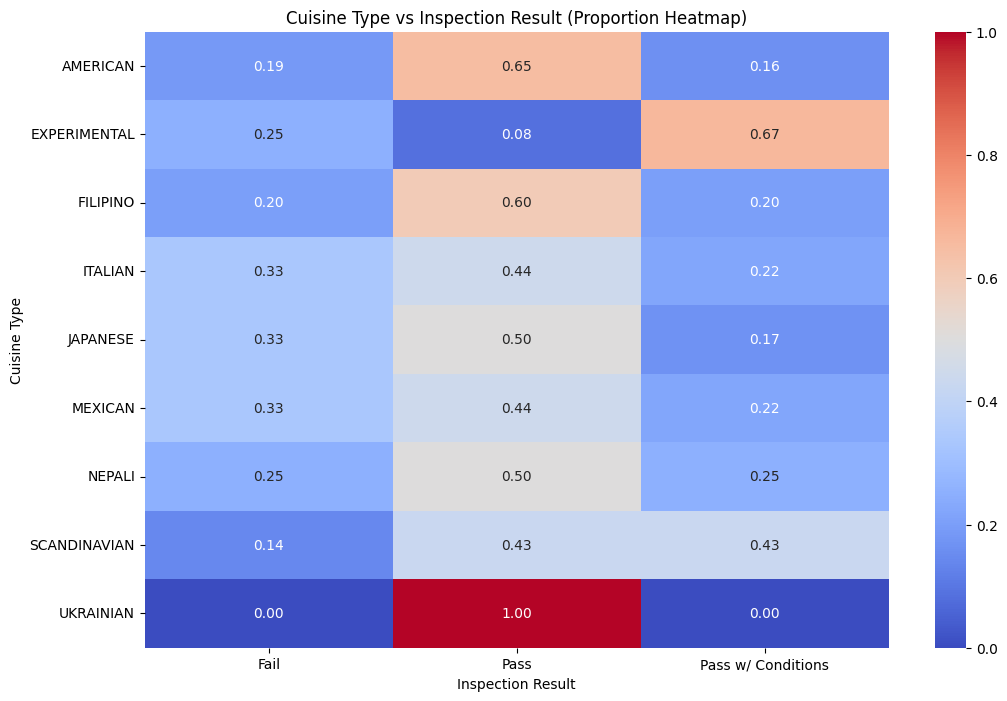

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Create Critical Violation count
merged_df["Critical_Violation_Count"] = merged_df["Violations"].apply(
    lambda x: str(x).lower().count("critical") if pd.notnull(x) else 0
)

# ----------------- BIVARIATE 1: Cuisine Type vs Average Critical Violations -----------------

# Group by Cuisine and calculate average number of critical violations
cuisine_critical_avg = merged_df.groupby("Cuisine")["Critical_Violation_Count"].mean().sort_values(ascending=False)

# Print Top 10
print("Top 10 Cuisines by Average Critical Violations:")
print(cuisine_critical_avg.head(10))

# Bar plot: Average Critical Violations by Cuisine
plt.figure(figsize=(12,8))
sns.barplot(x=cuisine_critical_avg.head(10), y=cuisine_critical_avg.head(10).index, palette="rocket")
plt.title("Top 10 Cuisines by Average Critical Violations")
plt.xlabel("Average Number of Critical Violations")
plt.ylabel("Cuisine Type")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# ----------------- BIVARIATE 2: Cuisine Type vs Inspection Results -----------------

# Crosstab Cuisine vs Inspection Result
cuisine_results_crosstab = pd.crosstab(merged_df["Cuisine"], merged_df["Results"], normalize='index')

# Print Top 10
print("\nCuisine Type vs Inspection Result Proportions (Top 10 Cuisines):")
print(cuisine_results_crosstab.head(10))

# Heatmap: Cuisine vs Inspection Result
plt.figure(figsize=(12,8))
sns.heatmap(cuisine_results_crosstab.head(10), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cuisine Type vs Inspection Result (Proportion Heatmap)")
plt.xlabel("Inspection Result")
plt.ylabel("Cuisine Type")
plt.show()

# Machine Learning for Question 1


In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load your CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Create binary Pass/Fail label
merged_df["Pass_Fail"] = merged_df["Results"].apply(lambda x: 1 if "Pass" in x else 0)

# Encode Cuisine into numbers
le_cuisine = LabelEncoder()
merged_df["Cuisine_encoded"] = le_cuisine.fit_transform(merged_df["Cuisine"].astype(str))

# Features and target
X = merged_df[["Cuisine_encoded"]]
y = merged_df["Pass_Fail"]

# Split data with stratification to avoid single-class issue
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.77      1.00      0.87        24

    accuracy                           0.77        31
   macro avg       0.39      0.50      0.44        31
weighted avg       0.60      0.77      0.68        31


Confusion Matrix:
[[ 0  7]
 [ 0 24]]


/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Hypothesis Test for Question 1

In [64]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Crosstab: Cuisine vs Inspection Results
contingency_table = pd.crosstab(merged_df["Cuisine"], merged_df["Results"])

# Print the contingency table (optional)
print("Cuisine vs Inspection Results Contingency Table:")
print(contingency_table)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Result: Reject the Null Hypothesis (There IS a significant relationship).")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant relationship).")


Cuisine vs Inspection Results Contingency Table:
Results       Fail  Pass  Pass w/ Conditions
Cuisine                                     
AMERICAN         8    28                   7
EXPERIMENTAL     3     1                   8
FILIPINO         1     3                   1
ITALIAN          3     4                   2
JAPANESE         2     3                   1
MEXICAN          3     4                   2
NEPALI           2     4                   2
SCANDINAVIAN     1     3                   3
UKRAINIAN        0     2                   0

Chi-Square Test Results:
Chi2 Statistic: 20.3567
Degrees of Freedom: 16
P-Value: 0.2046
Result: Fail to Reject the Null Hypothesis (No significant relationship).


# Time Sereis for Question 1

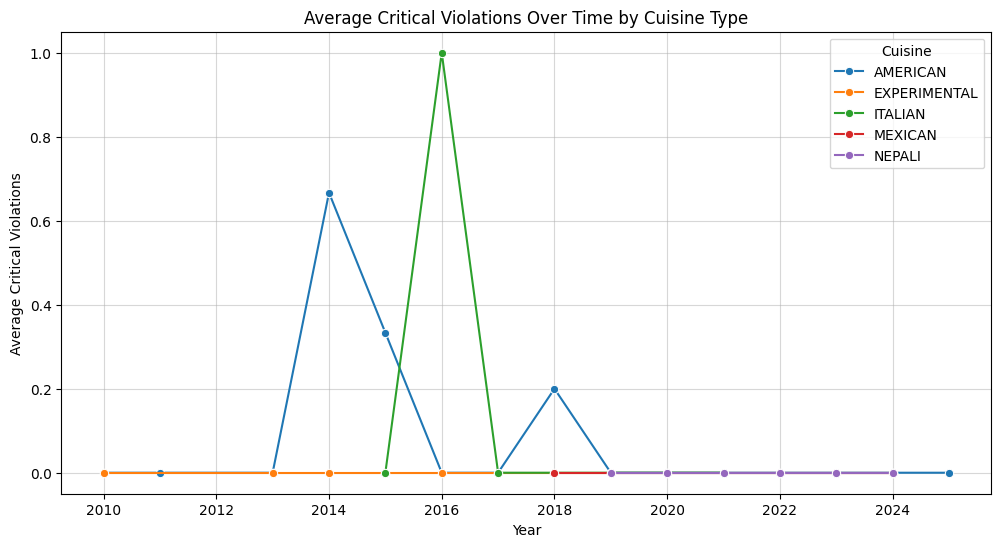

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Convert date and prepare columns
merged_df["Inspection Date"] = pd.to_datetime(merged_df["Inspection Date"])
merged_df["Year"] = merged_df["Inspection Date"].dt.year
merged_df["Critical_Violation_Count"] = merged_df["Violations"].apply(
    lambda x: str(x).lower().count("critical") if pd.notnull(x) else 0
)

# Get Top 5 Cuisines
top_cuisines = merged_df["Cuisine"].value_counts().head(5).index

# Filter for top cuisines
df_top_cuisines = merged_df[merged_df["Cuisine"].isin(top_cuisines)]

# Group and calculate average
avg_critical_cuisine = df_top_cuisines.groupby(["Year", "Cuisine"])["Critical_Violation_Count"].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_critical_cuisine, x="Year", y="Critical_Violation_Count", hue="Cuisine", marker="o")
plt.title("Average Critical Violations Over Time by Cuisine Type")
plt.xlabel("Year")
plt.ylabel("Average Critical Violations")
plt.grid(alpha=0.5)
plt.show()


# Univariate Analysis for Question 2

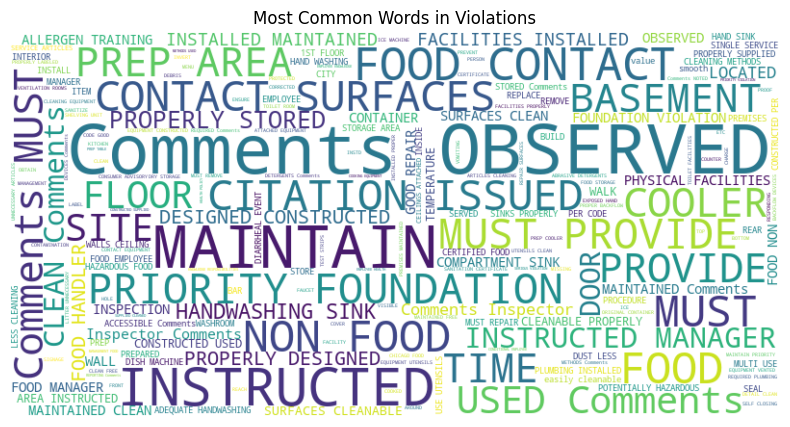


Top 10 Neighborhoods by Number of Inspections:
Neighborhood
WEST LOOP             34
WICKER PARK           14
RIVER NORTH           14
FULTON MARKET          9
ARCHER HEIGHTS         9
UNIVERSITY VILLAGE     8
LOGAN SQUARE           6
UKRAINIAN VILLAGE      5
AVONDALE               2
Name: count, dtype: int64


/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_79090/1008117346.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="muted")


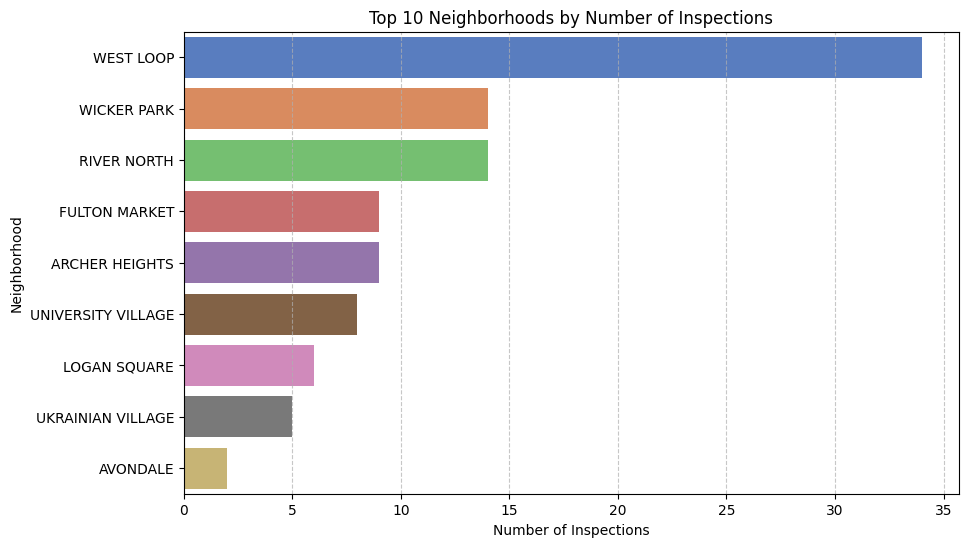

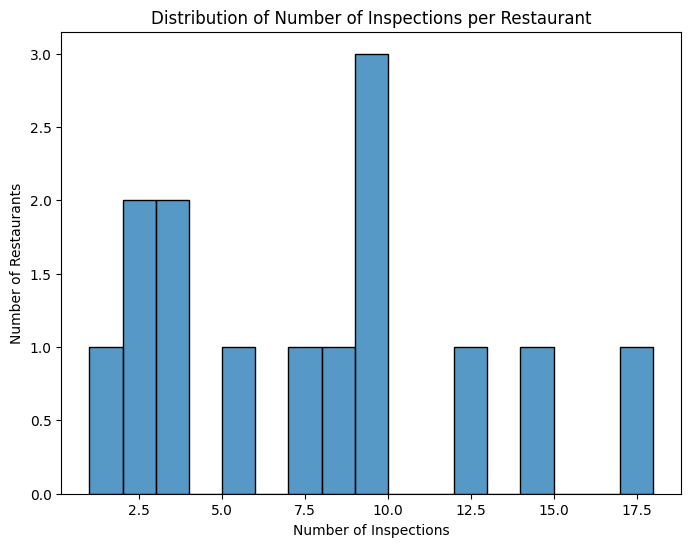

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load  CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# ----------------- Word Cloud of Violations -----------------
text = " ".join(str(v) for v in merged_df["Violations"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Violations")
plt.show()

# ----------------- Top 10 Neighborhoods -----------------
top_neighborhoods = merged_df["Neighborhood"].value_counts().head(10)
print("\nTop 10 Neighborhoods by Number of Inspections:")
print(top_neighborhoods)

plt.figure(figsize=(10,6))
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="muted")
plt.title("Top 10 Neighborhoods by Number of Inspections")
plt.xlabel("Number of Inspections")
plt.ylabel("Neighborhood")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# ----------------- Histogram of Inspections per Restaurant -----------------
inspections_per_restaurant = merged_df["Name"].value_counts()

plt.figure(figsize=(8,6))
sns.histplot(inspections_per_restaurant, bins=range(1, inspections_per_restaurant.max()+2))
plt.title("Distribution of Number of Inspections per Restaurant")
plt.xlabel("Number of Inspections")
plt.ylabel("Number of Restaurants")
plt.show()



# Bivariate Analysis for Question 2


Neighborhood vs Inspection Results Proportions (Top 10 Neighborhoods):
Results                 Fail      Pass  Pass w/ Conditions
Neighborhood                                              
ARCHER HEIGHTS      0.333333  0.444444            0.222222
AVONDALE            0.000000  1.000000            0.000000
FULTON MARKET       0.222222  0.666667            0.111111
LOGAN SQUARE        0.333333  0.500000            0.166667
RIVER NORTH         0.000000  0.785714            0.214286
UKRAINIAN VILLAGE   0.200000  0.600000            0.200000
UNIVERSITY VILLAGE  0.250000  0.500000            0.250000
WEST LOOP           0.264706  0.500000            0.235294
WICKER PARK         0.285714  0.142857            0.571429


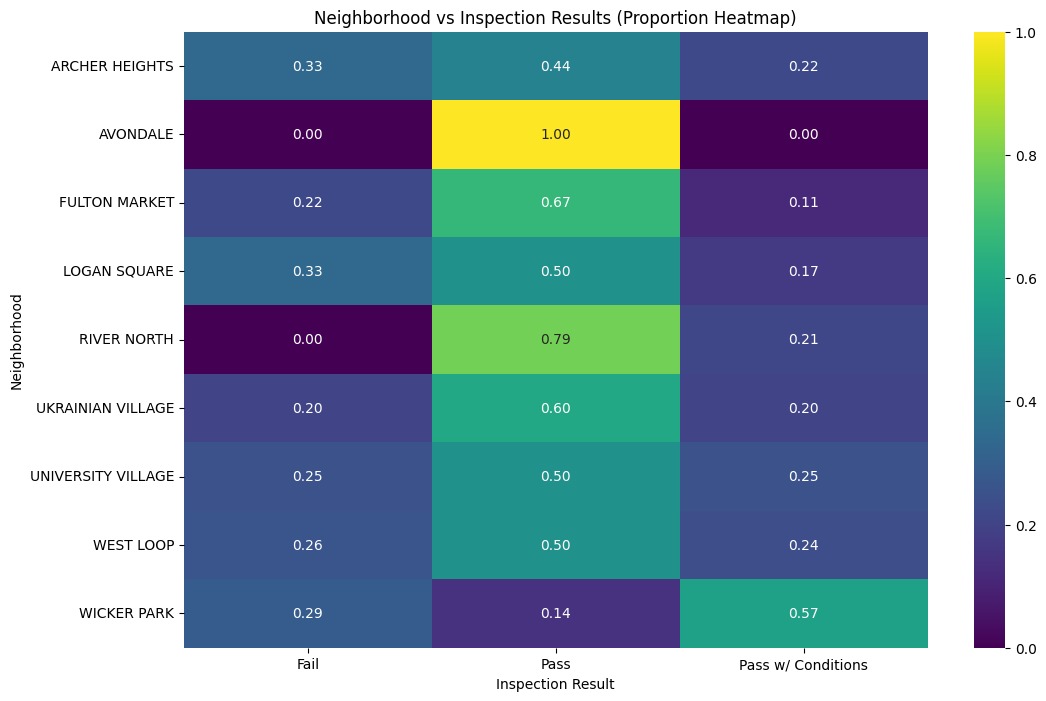

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# ----------------- Neighborhood vs Inspection Results -----------------

# Crosstab: Neighborhood and Inspection Results
neighborhood_results = pd.crosstab(merged_df["Neighborhood"], merged_df["Results"], normalize='index')

print("\nNeighborhood vs Inspection Results Proportions (Top 10 Neighborhoods):")
print(neighborhood_results.head(10))

# Heatmap for Top 10 Neighborhoods
plt.figure(figsize=(12,8))
sns.heatmap(neighborhood_results.head(10), annot=True, cmap="viridis", fmt=".2f")
plt.title("Neighborhood vs Inspection Results (Proportion Heatmap)")
plt.xlabel("Inspection Result")
plt.ylabel("Neighborhood")
plt.show()


Top 10 Neighborhoods by Failure Rate:
Neighborhood
ARCHER HEIGHTS        0.333333
LOGAN SQUARE          0.333333
WICKER PARK           0.285714
WEST LOOP             0.264706
UNIVERSITY VILLAGE    0.250000
FULTON MARKET         0.222222
UKRAINIAN VILLAGE     0.200000
AVONDALE              0.000000
RIVER NORTH           0.000000
Name: Pass_Fail, dtype: float64


/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_79090/2986779955.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fail_rate_by_neighborhood.values, y=fail_rate_by_neighborhood.index, palette="Reds")


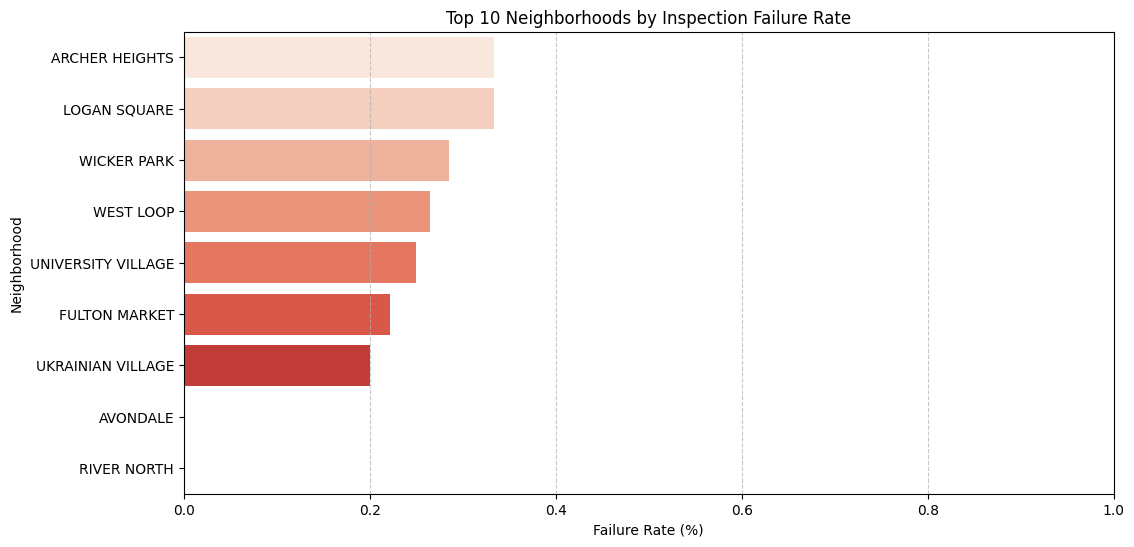

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# ----------------- Failure Rate (%) by Neighborhood -----------------

# Create Pass/Fail column (1 = Pass, 0 = Fail)
merged_df["Pass_Fail"] = merged_df["Results"].apply(lambda x: 1 if "Pass" in x else 0)

# Group by Neighborhood and calculate Fail Rate
fail_rate_by_neighborhood = merged_df.groupby("Neighborhood")["Pass_Fail"].apply(lambda x: 1 - x.mean())
fail_rate_by_neighborhood = fail_rate_by_neighborhood.sort_values(ascending=False).head(10)

print("Top 10 Neighborhoods by Failure Rate:")
print(fail_rate_by_neighborhood)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=fail_rate_by_neighborhood.values, y=fail_rate_by_neighborhood.index, palette="Reds")
plt.title("Top 10 Neighborhoods by Inspection Failure Rate")
plt.xlabel("Failure Rate (%)")
plt.ylabel("Neighborhood")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# ----------------- Average Critical Violations by Neighborhood -----------------

# Count 'Critical' keywords in Violations
merged_df["Critical_Violation_Count"] = merged_df["Violations"].apply(
    lambda x: str(x).lower().count("critical") if pd.notnull(x) else 0
)

# Group by Neighborhood and calculate average Critical Violations
critical_avg_by_neighborhood = merged_df.groupby("Neighborhood")["Critical_Violation_Count"].mean().sort_values(ascending=False).head(10)





# Machine Learning for Question 2

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Create binary Pass/Fail column (1 = Pass, 0 = Fail)
merged_df["Pass_Fail"] = merged_df["Results"].apply(lambda x: 1 if "Pass" in x else 0)

# Encode Neighborhood into numbers
le_neighborhood = LabelEncoder()
merged_df["Neighborhood_encoded"] = le_neighborhood.fit_transform(merged_df["Neighborhood"].astype(str))

# Features and target
X = merged_df[["Neighborhood_encoded"]]
y = merged_df["Pass_Fail"]

# Split data with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.77      1.00      0.87        24

    accuracy                           0.77        31
   macro avg       0.39      0.50      0.44        31
weighted avg       0.60      0.77      0.68        31


Confusion Matrix:
[[ 0  7]
 [ 0 24]]


/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Hypothesis Test for Question 2

In [57]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Crosstab: Neighborhood vs Results
contingency_table = pd.crosstab(merged_df["Neighborhood"], merged_df["Results"])

# Print the contingency table (optional)
print("Neighborhood vs Inspection Results Contingency Table:")
print(contingency_table)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Result: Reject the Null Hypothesis (There IS a significant relationship).")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant relationship).")


Neighborhood vs Inspection Results Contingency Table:
Results             Fail  Pass  Pass w/ Conditions
Neighborhood                                      
ARCHER HEIGHTS         3     4                   2
AVONDALE               0     2                   0
FULTON MARKET          2     6                   1
LOGAN SQUARE           2     3                   1
RIVER NORTH            0    11                   3
UKRAINIAN VILLAGE      1     3                   1
UNIVERSITY VILLAGE     2     4                   2
WEST LOOP              9    17                   8
WICKER PARK            4     2                   8

Chi-Square Test Results:
Chi2 Statistic: 19.1699
Degrees of Freedom: 16
P-Value: 0.2599
Result: Fail to Reject the Null Hypothesis (No significant relationship).


# Time Series for Question 2

/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_79090/1478047592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_neighborhoods["Pass_Fail"] = df_top_neighborhoods["Results"].apply(lambda x: 1 if "Pass" in x else 0)


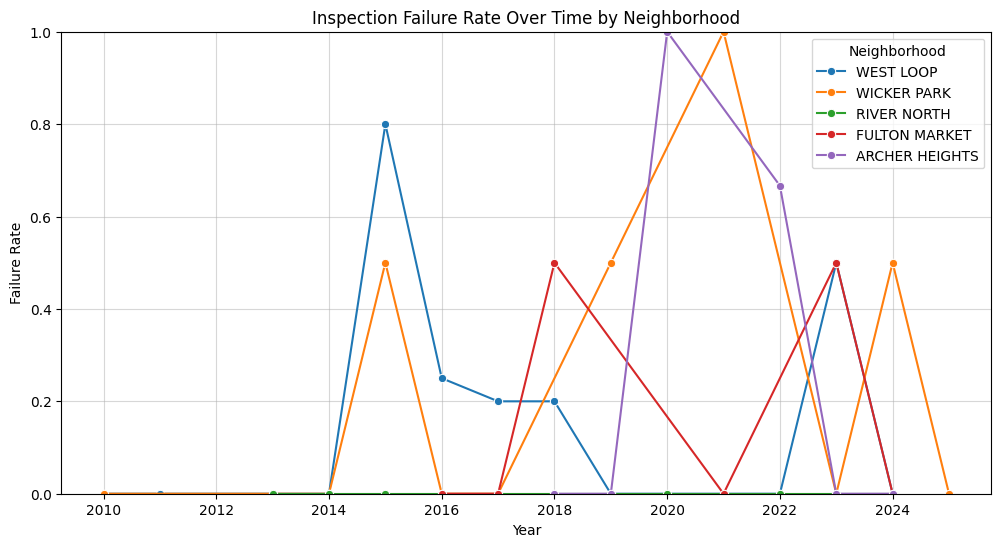

In [94]:
# Get Top 5 Neighborhoods
top_neighborhoods = merged_df["Neighborhood"].value_counts().head(5).index

# Filter for top neighborhoods
df_top_neighborhoods = merged_df[merged_df["Neighborhood"].isin(top_neighborhoods)]

# Create Pass/Fail binary
df_top_neighborhoods["Pass_Fail"] = df_top_neighborhoods["Results"].apply(lambda x: 1 if "Pass" in x else 0)

# Group and calculate failure rate
fail_rate_neighborhood = df_top_neighborhoods.groupby(["Year", "Neighborhood"])["Pass_Fail"].apply(lambda x: 1 - x.mean()).reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=fail_rate_neighborhood, x="Year", y="Pass_Fail", hue="Neighborhood", marker="o")
plt.title("Inspection Failure Rate Over Time by Neighborhood")
plt.xlabel("Year")
plt.ylabel("Failure Rate")
plt.ylim(0, 1)
plt.grid(alpha=0.5)
plt.show()


# Univariate Analysis for Question 3

Number of Inspections Per Year:
Inspection_Year
2010     2
2011     1
2013     4
2014     4
2015     8
2016     9
2017     7
2018     9
2019     8
2020     4
2021     6
2022     9
2023    17
2024    12
2025     1
Name: count, dtype: int64


/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_79090/1355170219.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inspections_per_year.index, y=inspections_per_year.values, palette="muted")


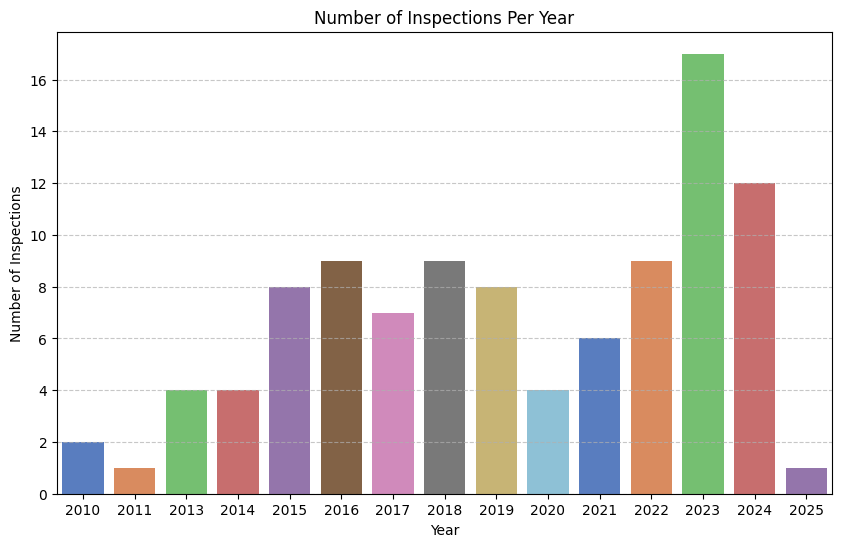


Average Critical Violations Per Year:
Inspection_Year
2010    0.000000
2011    0.000000
2013    0.000000
2014    0.500000
2015    0.125000
2016    0.222222
2017    0.000000
2018    0.111111
2019    0.000000
2020    0.000000
2021    0.000000
2022    0.000000
2023    0.000000
2024    0.000000
2025    0.000000
Name: Critical_Violation_Count, dtype: float64


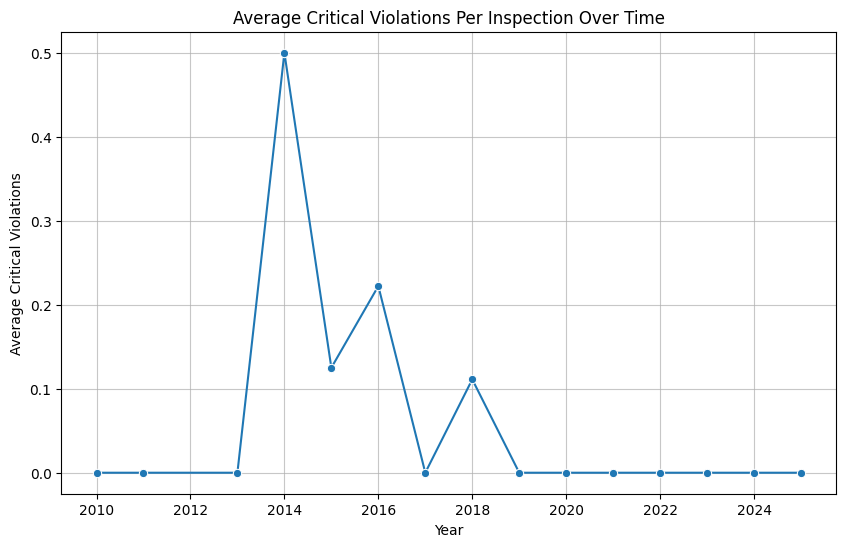


Top 10 Restaurants by Number of Inspections:
Name
AVEC                17
BAVETTE'S           14
SCHWA               12
ORIOLE               9
XOCOME ANTOJERIA     9
MONTEVERDE           9
THE MOMO WORLD       8
ELSKE                7
KASAMA               5
KYOTEN NEXT DOOR     3
Name: count, dtype: int64


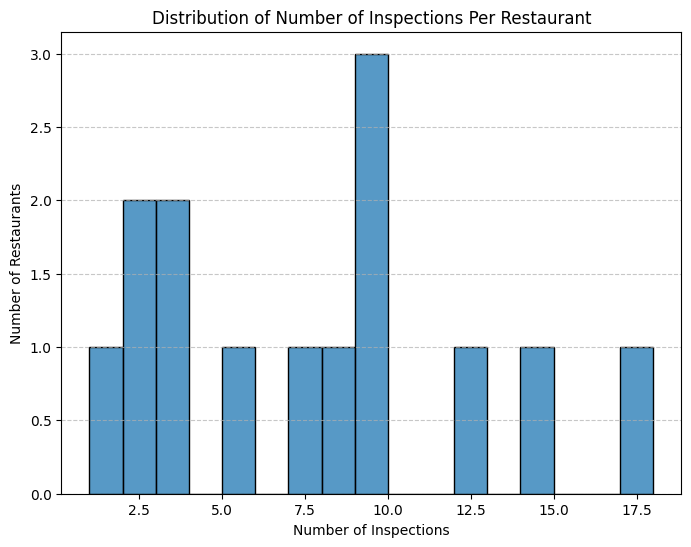

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load  CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# ----------------- Inspections Over Time -----------------

# Convert 'Inspection Date' to datetime
merged_df["Inspection Date"] = pd.to_datetime(merged_df["Inspection Date"])

# Extract Year
merged_df["Inspection_Year"] = merged_df["Inspection Date"].dt.year

# Count inspections per year
inspections_per_year = merged_df["Inspection_Year"].value_counts().sort_index()
print("Number of Inspections Per Year:")
print(inspections_per_year)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=inspections_per_year.index, y=inspections_per_year.values, palette="muted")
plt.title("Number of Inspections Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Inspections")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ----------------- Average Critical Violations by Year -----------------

# Create Critical Violation count
merged_df["Critical_Violation_Count"] = merged_df["Violations"].apply(
    lambda x: str(x).lower().count("critical") if pd.notnull(x) else 0
)

# Group by Year and calculate average critical violations
avg_critical_by_year = merged_df.groupby("Inspection_Year")["Critical_Violation_Count"].mean()
print("\nAverage Critical Violations Per Year:")
print(avg_critical_by_year)

# Line plot
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_critical_by_year.index, y=avg_critical_by_year.values, marker="o")
plt.title("Average Critical Violations Per Inspection Over Time")
plt.xlabel("Year")
plt.ylabel("Average Critical Violations")
plt.grid(alpha=0.7)
plt.show()

# ----------------- Number of Inspections Per Restaurant -----------------

# Count number of inspections per restaurant
inspections_per_restaurant = merged_df["Name"].value_counts()
print("\nTop 10 Restaurants by Number of Inspections:")
print(inspections_per_restaurant.head(10))

# Histogram
plt.figure(figsize=(8,6))
sns.histplot(inspections_per_restaurant, bins=range(1, inspections_per_restaurant.max()+2))
plt.title("Distribution of Number of Inspections Per Restaurant")
plt.xlabel("Number of Inspections")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Bivariate Analysis for Question 3

Pass Rate by Year:
Inspection_Year
2010    1.000000
2011    1.000000
2013    1.000000
2014    1.000000
2015    0.375000
2016    0.888889
2017    0.857143
2018    0.777778
2019    0.750000
2020    0.750000
2021    0.833333
2022    0.666667
2023    0.705882
2024    0.833333
2025    1.000000
Name: Pass_Fail, dtype: float64


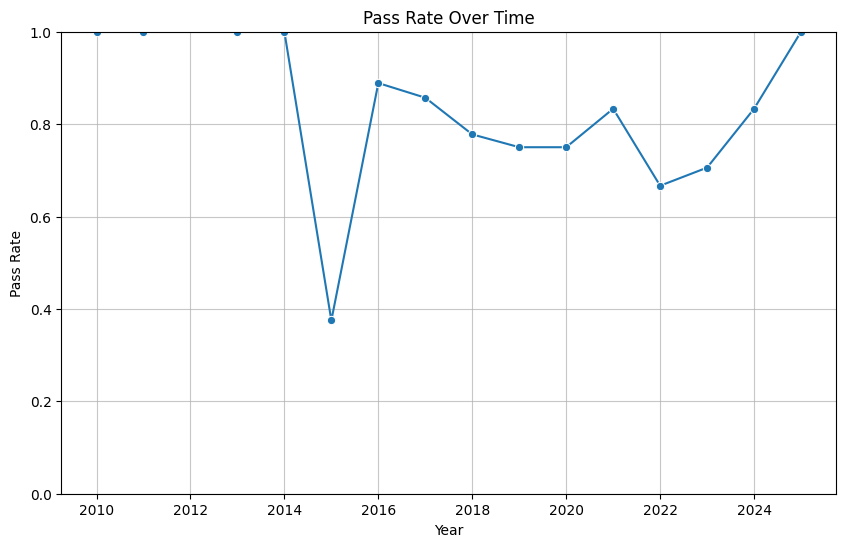

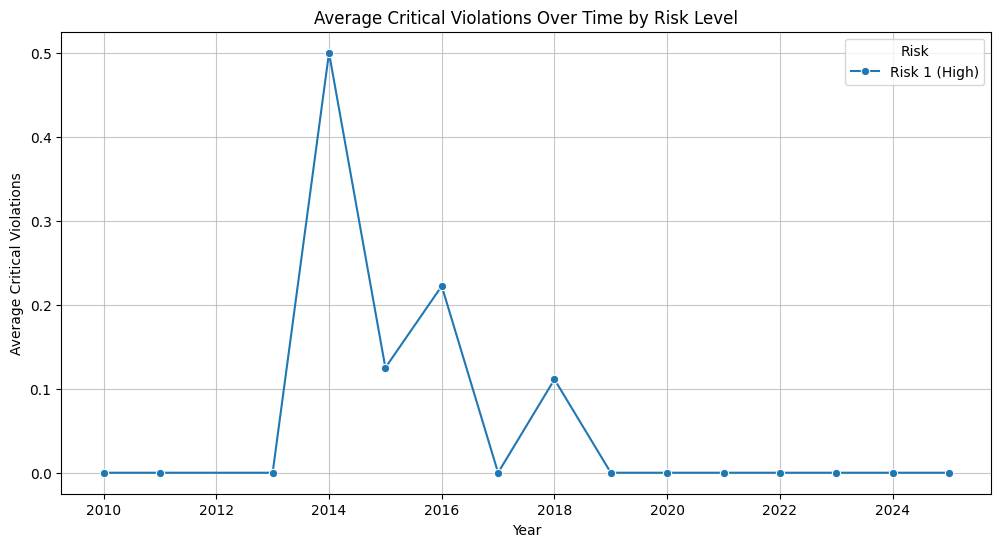


First vs Last Inspection Results Crosstab:
Last_Result         Fail  Pass  Pass w/ Conditions
First_Result                                      
Fail                   1     4                   2
Pass                   1     4                   1
Pass w/ Conditions     0     0                   1


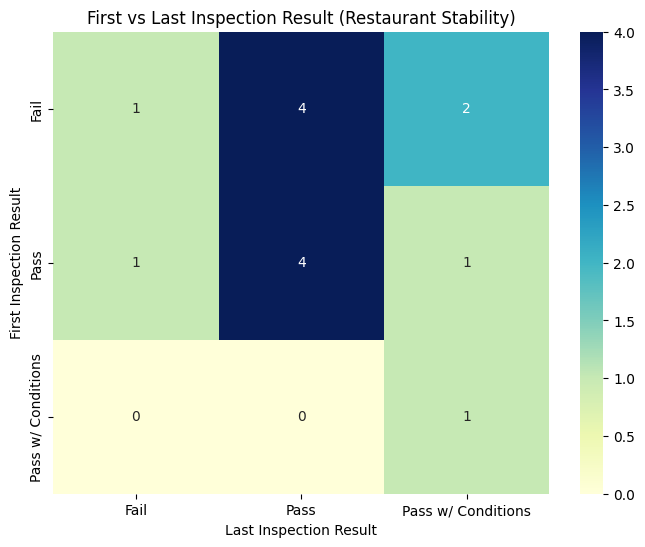

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Ensure Inspection Date is datetime
merged_df["Inspection Date"] = pd.to_datetime(merged_df["Inspection Date"])

# Extract Year
merged_df["Inspection_Year"] = merged_df["Inspection Date"].dt.year

# ----------------- iYear vs Pass Rate -----------------

# Create Pass/Fail binary
merged_df["Pass_Fail"] = merged_df["Results"].apply(lambda x: 1 if "Pass" in x else 0)

# Group by year and calculate pass rate
pass_rate_by_year = merged_df.groupby("Inspection_Year")["Pass_Fail"].mean()

print("Pass Rate by Year:")
print(pass_rate_by_year)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=pass_rate_by_year.index, y=pass_rate_by_year.values, marker="o")
plt.title("Pass Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Pass Rate")
plt.ylim(0, 1)
plt.grid(alpha=0.7)
plt.show()

# ----------------- Year vs Avg Critical Violations (by Risk Level) -----------------

# Create Critical Violation count
merged_df["Critical_Violation_Count"] = merged_df["Violations"].apply(
    lambda x: str(x).lower().count("critical") if pd.notnull(x) else 0
)

# Group by Year and Risk, calculate average critical violations
avg_critical_by_year_risk = merged_df.groupby(["Inspection_Year", "Risk"])["Critical_Violation_Count"].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_critical_by_year_risk, x="Inspection_Year", y="Critical_Violation_Count", hue="Risk", marker="o")
plt.title("Average Critical Violations Over Time by Risk Level")
plt.xlabel("Year")
plt.ylabel("Average Critical Violations")
plt.grid(alpha=0.7)
plt.show()

# ----------------- First vs Last Inspection Result Comparison -----------------

# Sort by restaurant + inspection date
merged_df_sorted = merged_df.sort_values(by=["Name", "Inspection Date"])

# Get first and last inspection result per restaurant
first_last = merged_df_sorted.groupby("Name").agg(
    First_Result=("Results", "first"),
    Last_Result=("Results", "last")
)

# Crosstab: First vs Last Result
first_last_crosstab = pd.crosstab(first_last["First_Result"], first_last["Last_Result"])

print("\nFirst vs Last Inspection Results Crosstab:")
print(first_last_crosstab)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(first_last_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("First vs Last Inspection Result (Restaurant Stability)")
plt.xlabel("Last Inspection Result")
plt.ylabel("First Inspection Result")
plt.show()


# Machine Learning for Question 3

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Ensure Inspection Date is datetime
merged_df["Inspection Date"] = pd.to_datetime(merged_df["Inspection Date"])

# Create Pass/Fail binary column
merged_df["Pass_Fail"] = merged_df["Results"].apply(lambda x: 1 if "Pass" in x else 0)

# Count Critical Violations
merged_df["Critical_Violation_Count"] = merged_df["Violations"].apply(
    lambda x: str(x).lower().count("critical") if pd.notnull(x) else 0
)

# Sort by restaurant and inspection date
merged_df_sorted = merged_df.sort_values(by=["Name", "Inspection Date"])

# Create shifted column: next inspection result
merged_df_sorted["Next_Pass_Fail"] = merged_df_sorted.groupby("Name")["Pass_Fail"].shift(-1)

# Drop rows without a 'next' inspection
ml_df = merged_df_sorted.dropna(subset=["Next_Pass_Fail"])

# Encode Risk level
le_risk = LabelEncoder()
ml_df["Risk_encoded"] = le_risk.fit_transform(ml_df["Risk"].astype(str))

# Features: current Pass/Fail, Critical Violations, Risk
X = ml_df[["Pass_Fail", "Critical_Violation_Count", "Risk_encoded"]]
y = ml_df["Next_Pass_Fail"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.81      1.00      0.90        22

    accuracy                           0.81        27
   macro avg       0.41      0.50      0.45        27
weighted avg       0.66      0.81      0.73        27


Confusion Matrix:
[[ 0  5]
 [ 0 22]]


/var/folders/81/r7br4l4x24ddr8y05z5kc7440000gn/T/ipykernel_79090/1403190849.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df["Risk_encoded"] = le_risk.fit_transform(ml_df["Risk"].astype(str))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

# Hypothesis Test for Question 3

In [83]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load CSV
merged_df = pd.read_csv("merged_cleaned.csv")

# Ensure Inspection Date is datetime
merged_df["Inspection Date"] = pd.to_datetime(merged_df["Inspection Date"])

# Create Pass/Fail binary column
merged_df["Pass_Fail"] = merged_df["Results"].apply(lambda x: 1 if "Pass" in x else 0)

# Sort by restaurant and inspection date
merged_df_sorted = merged_df.sort_values(by=["Name", "Inspection Date"])

# Create shifted column: next inspection result
merged_df_sorted["Next_Pass_Fail"] = merged_df_sorted.groupby("Name")["Pass_Fail"].shift(-1)

# Drop rows without a next inspection
ml_df = merged_df_sorted.dropna(subset=["Next_Pass_Fail"])

# Crosstab: Past vs Next inspection result
contingency_table = pd.crosstab(ml_df["Pass_Fail"], ml_df["Next_Pass_Fail"])

print("Past vs Next Inspection Result Contingency Table:")
print(contingency_table)

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Result: Reject the Null Hypothesis (There IS a significant relationship between past and next inspection results).")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant relationship found).")


Past vs Next Inspection Result Contingency Table:
Next_Pass_Fail  0.0  1.0
Pass_Fail               
0                 4   17
1                12   54

Chi-Square Test Results:
Chi2 Statistic: 0.0000
Degrees of Freedom: 1
P-Value: 1.0000
Result: Fail to Reject the Null Hypothesis (No significant relationship found).


# Time Series for Question 3

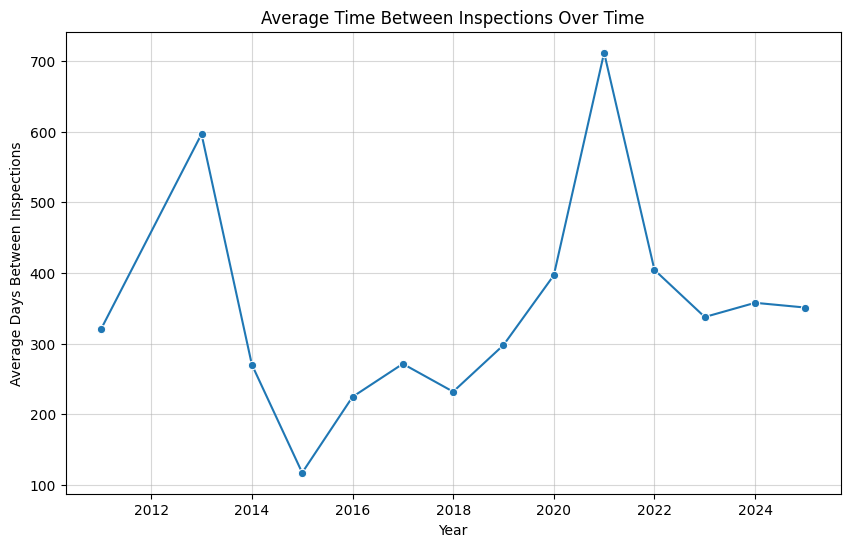

In [101]:
# Sort
merged_df = merged_df.sort_values(by=["Name", "Inspection Date"])

# Calculate time between inspections (per restaurant)
merged_df["Days_Between"] = merged_df.groupby("Name")["Inspection Date"].diff().dt.days

# Remove NaNs (first inspections won't have a 'before' date)
time_gap_df = merged_df.dropna(subset=["Days_Between"])

# Group by Year and average
avg_days_between = time_gap_df.groupby("Year")["Days_Between"].mean()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_days_between.index, y=avg_days_between.values, marker="o")
plt.title("Average Time Between Inspections Over Time")
plt.xlabel("Year")
plt.ylabel("Average Days Between Inspections")
plt.grid(alpha=0.5)
plt.show()
